In [2]:
# pip install tld==0.6.3
import numpy as np 
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld

In [3]:
urldata1 = pd.read_csv("urldata1.csv")
urldata1.head()

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [4]:
#Removing the unnamed columns as it is not necesary.
#urldata1 = urldata1.drop(['Unnamed: 0','label'],axis=1)
urldata1 = urldata1.rename(columns = {"result":"label"})
urldata1.head()

,url,label
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [5]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [6]:
def convert_to_int(word):
    word_dict = {'bad':1, 'good':0}
    return word_dict[word]

urls_data['label'] = urls_data['label'].apply(lambda x : convert_to_int(x))
urls_data.head()

,url,label
0,diaryofagameaddict.com,1
1,espdesign.com.au,1
2,iamagameaddict.com,1
3,kalantzis.net,1
4,slightlyoffcenter.net,1


In [7]:
urldata = pd.concat([urldata1, urls_data], ignore_index = True)
urldata.head()

,url,label
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [8]:
from urllib.parse import urlparse

In [9]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [10]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [11]:
urlparse('https://www.google.com').netloc

'www.google.com'

In [12]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [13]:
urlparse('https://www.youtube.com/watch?v=megsXkCLzVo&list=RDmegsXkCLzVo&start_radio=1').path

'/watch'

In [14]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [15]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [16]:
get_tld('https://www.youtube.com/watch?v=megsXkCLzVo&list=RDmegsXkCLzVo&start_radio=1')

'youtube.com'

In [17]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,0,22,14,0,0,google.com,10
1,https://www.youtube.com,0,23,15,0,0,youtube.com,11
2,https://www.facebook.com,0,24,16,0,0,facebook.com,12
3,https://www.baidu.com,0,21,13,0,0,baidu.com,9
4,https://www.wikipedia.org,0,25,17,0,0,wikipedia.org,13


In [18]:
urldata = urldata.drop("tld",1)

C:\Users\ASHOKR~1\AppData\Local\Temp/ipykernel_9636/932459447.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  urldata = urldata.drop("tld",1)


In [19]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,0,22,14,0,0,10
1,https://www.youtube.com,0,23,15,0,0,11
2,https://www.facebook.com,0,24,16,0,0,12
3,https://www.baidu.com,0,21,13,0,0,9
4,https://www.wikipedia.org,0,25,17,0,0,13


In [20]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [21]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [22]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [23]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [24]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [25]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [26]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [27]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [28]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [29]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [30]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [31]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [35]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,0,22,14,0,0,10,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,0,23,15,0,0,11,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,0,24,16,0,0,12,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,0,21,13,0,0,9,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,0,25,17,0,0,13,0,0,0,0,2,0,1,1,1,0,20,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

In [49]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]

#Target Variable
y = urldata['label']

In [50]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [59]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)


0.9463537094617323

In [60]:
print(confusion_matrix(y_test,dt_predictions))

[[469358  13751]
 [ 18944 107402]]


In [52]:
#Random Forest Classifier
dt_model = RandomForestClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)


0.9548170086388659

In [53]:
print(confusion_matrix(y_test,dt_predictions))


[[473736   9373]
 [ 18164 108182]]


In [56]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

C:\Users\Ashok Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9116669811552944

In [57]:
print(confusion_matrix(y_test,log_predictions))

[[477909   5200]
 [ 48635  77711]]


In [61]:
def website(site):
    from urllib.parse import urlparse
    from tld import get_tld
    url_length = len(str(site))
    hostname_length = len(urlparse(site).netloc)
    path_length = len(urlparse(site).path)
    def fd_length(url):
        urlpath= urlparse(url).path
        try:
            return len(urlpath.split('/')[1])
        except:
            return 0
    fd_length = fd_length(site)
    tld = get_tld(site,fail_silently=True)
    def tld_length(tld):
        try:
            return len(tld)
        except:
            return -1

    tld_length = tld_length(get_tld(site,fail_silently=True))
    def digit_count(url):
        digits = 0
        for i in url:
            if i.isnumeric():
                digits = digits + 1
        return digits
    count_digits= digit_count(site)
    def letter_count(url):
        letters = 0
        for i in url:
            if i.isalpha():
                letters = letters + 1
        return letters
    count_letters = letter_count(site)
    def no_of_dir(url):
        urldir = urlparse(url).path
        return urldir.count('/')
    count_dir=no_of_dir(site)
    count_ = site.count('-')
    count_ad = site.count('@')
    count_qu = site.count('?')
    count_pr = site.count('%')
    count_dot = site.count('.')
    count_eql = site.count('=')
    count_http = site.count('http')
    count_https = site.count('https')
    count_www = site.count('www')
    site_dict = [hostname_length,
       path_length, fd_length, count_, count_ad, count_qu,
       count_pr, count_dot, count_eql, count_http,count_https, count_www, count_digits,
       count_letters, count_dir]
    return site_dict   

In [62]:
site = input("Input Site Here: ")
phishing_predict = dt_model.predict([website(site)])
if phishing_predict == 0:
    print('You are Using Safe Website')
else:
    print('Beware From Phishing Website')

Input Site Here: 
Beware From Phishing Website


In [45]:
# phishing website link example
# http://ie.microsoft.com/testdrive/Browser/DownloadReputation/Default.html?o=1

<AxesSubplot:>

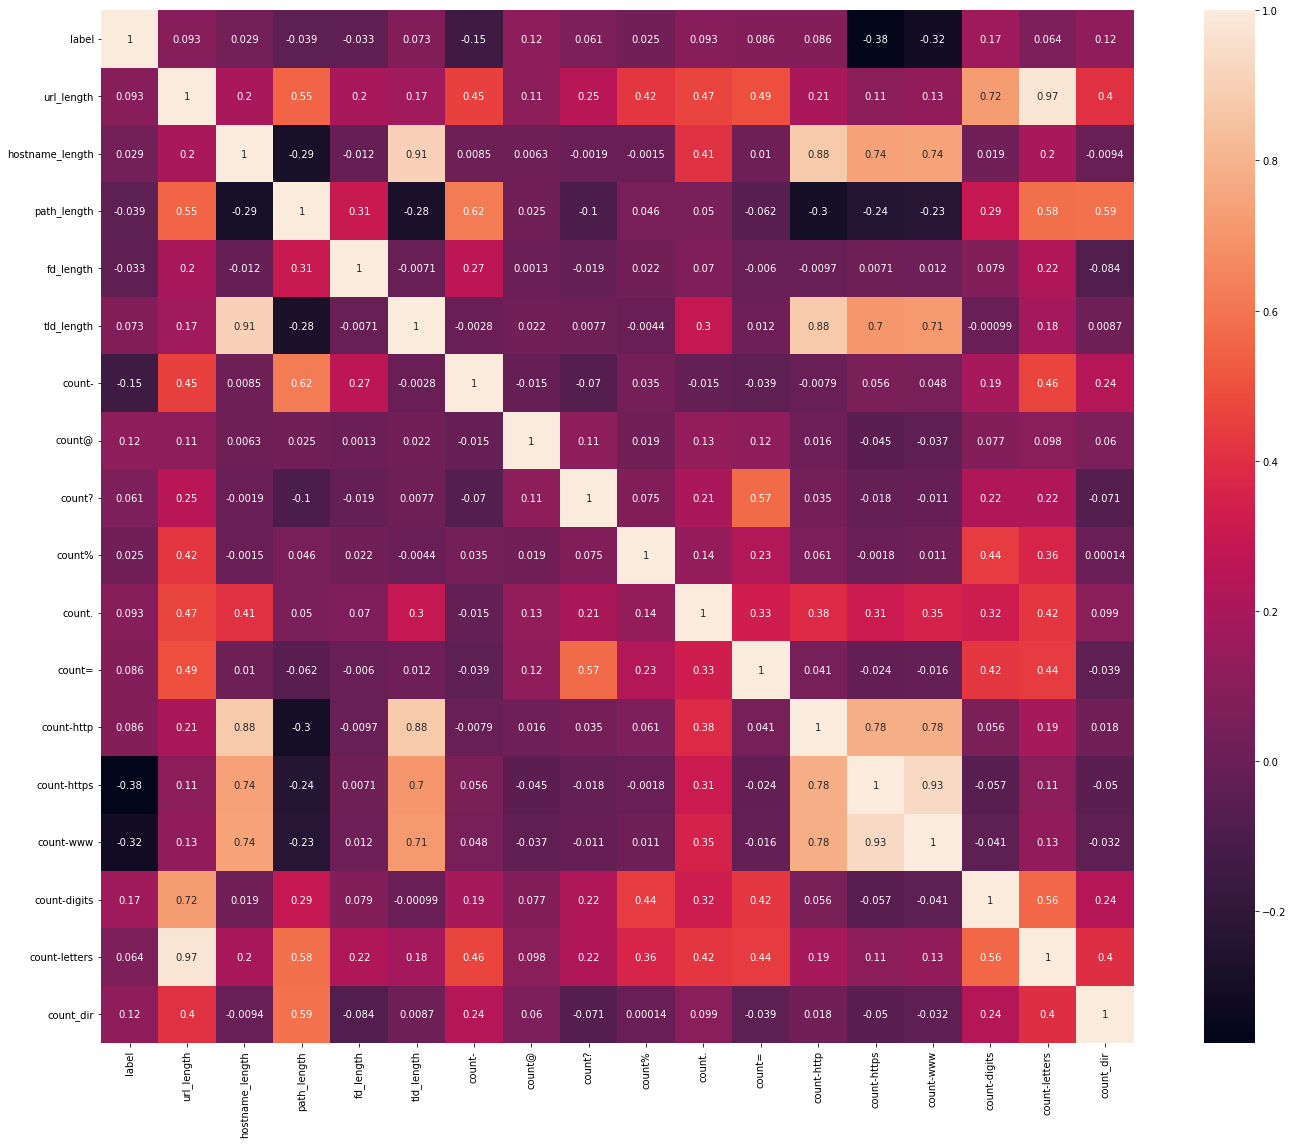

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

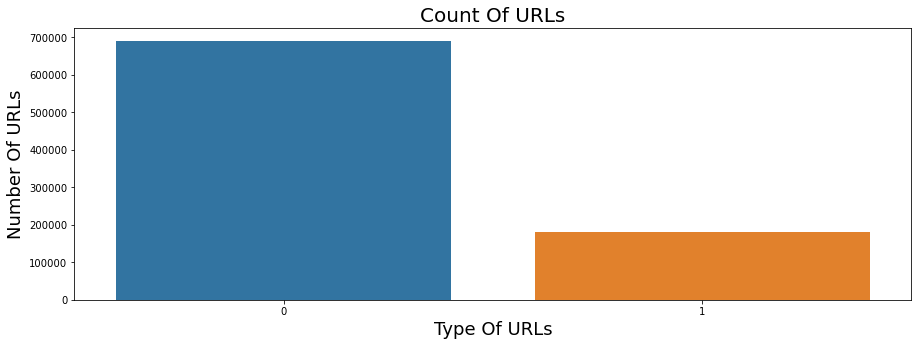

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)